Juhamatti Vasamaa


## Data analysis and knowledge discovery - Exercise 4: Unsupervised learning

This is the template for the fourth exercise. The purpose of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering algorithm to find patterns - in this case clusters of ships with the same type - in the data, and then evaluate the performance of the algorithm.


 - As in the two previous exercises, the grading scale is 0 (failed), 50 (passed) and 100 (passed with honors).
 
 - For a passing grade each part of the exercise must be done and questions answered. Some small mistakes can be tolerated but try to avoid any. All of the cells in your submitted notebook should be able to run without errors. Clean up the notebook before submitting it by deleting unnecessary cells and pieces of code for better readability.

 - Remember to comment your code to explain how it works and what it is supposed to do (messy, uncommented and badly written code may contribute to a failing grade).
 
 - Answer the questions asked in the assignments in the markdown cells below the code cells.

 - For doing both the exercise and the optional bonus task sufficiently well, you will be awarded one bonus point (passed with honors).
 
 - If you are having problems with this exercise, try google or stackoverflow first, but do not merely copy-paste any code you may find, since it can be considered plagiarism. (See exercise guidelines in the Moodle page of this course) If you still can't find a solution to your problem, ask for help in the course discussion forum in moodle or contact ilksuu@utu.fi.

### Import all the libraries etc. you need

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score,adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
sns.set()

### Read the data

- Download the exercise 4 data from exercise 4 tab in the Moodle page of this course.
- Read the ship data from the csv file into a Pandas dataframe.
- This file is already cleaned of outliers and missing values etc. Normally data cleaning is an important part of unsupervised learning, but since it has already been done in the previous exercises, we can start this one with already clean data.

In [ ]:
#reading ship data to Pandas dataframe
data = pd.read_csv('shipdata.csv')
df = pd.DataFrame(data)

### Part 1: Preprocess and visualize the data

 - Use "Speed", "COG", "Length", and "Gross_tonnage" as features for this exercise. You will also need the 'Ship_type' -column later to be used as labels for evaluating the performance of the clustering algorithm.
  
 - Perform z-score standardization on the features to ensure that all features have the same scale.
 
 - Project the data to two dimensions by using principal component analysis (PCA) and visualize the resulting two-dimensional data in a scatter plot. Don't color the scatter plot yet. Can you guess where the different ship types are in the scatter plot? Don't worry if they're hard to see.
 
 - The set of features used in this exercise is not necessarily the most sensible from the point of view of real life maritime data-analysis, but rather has been chosen in an ad-hoc manner for the purpose of designing this exercise with a certain level of clustering performance. Consider the features given for now.

Text(0.5, 1.0, 'Z-score Standardized PCA without Ship types')

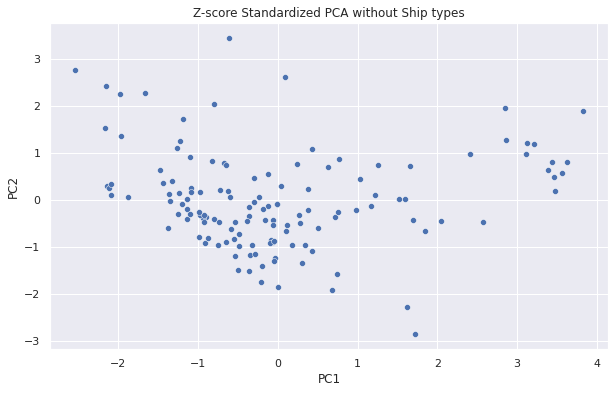

In [ ]:
#features and labels dataframe made
features = pd.DataFrame(data=df,columns=['Speed','COG','Length','Gross_tonnage'])
labels = pd.DataFrame(data=df,columns=['Ship_type'])

#Z-score standardization
scaler = StandardScaler() #calling scaler
standard = scaler.fit_transform(features) #fit and transform the variable values
standard_features = pd.DataFrame(standard,columns=['Speed','COG','Length','Gross_tonnage'])

#Two dimension PCA
#Shrinking our data to 2D format so we can interpret it better
pca = PCA(n_components=2)
pc = pca.fit_transform(standard_features)
 
#with our PC1 and PC2 vector.
pc_df = pd.DataFrame(data=pc,columns=['PC1','PC2'])

#plotting PCA's
plt.figure(figsize=[10,6])
sns.scatterplot(data=pc_df,x=pc_df['PC1'],y=pc_df['PC2'])
plt.title('Z-score Standardized PCA without Ship types')

####  Part 1 : Answers here:
<font color = red>I would guess that if we look at the above plot from left to right, then the few "Tug" ships are the few most left one dots forming small cluster at coordinates ((-2),(0-3)), next could be the "Cargo" ships at around ((-1,5)-(-0.5),(-1)-(2)) and most of the "Tanker" ships could be the ones from ((-0.5)-(4),(-2)-(2). This one is quite hard to explain or plot exactly what I mean so, thats why I tried to use coordinates to explain myself here.

### Part 2: Perform clustering on the data and evaluate the results using silhouette score

 - What is the significance of the linkage criterion in a hierarchical clustering algorithm?
 
 - Perform agglomerative hierarchical clustering on the data, trying different values for the "linkage" parameter. Use the actual number of different ship types for the number of clusters to find and default values for other parameters.
 
 - Use the z-score standardized 4-dimensional data for the clustering - not the PCA-transformed data!
 
 - Evaluate the clustering performance for each linkage criterion using a metric called "silhouette score". What does silhouette score quantify and how is it computed?

In [ ]:
linkage = ['ward','single','average','complete']
for linkage in linkage:
  #loops clustering four times using everytime different linkage
  amc = AgglomerativeClustering(n_clusters=3,linkage=linkage)
  label = amc.fit_predict(standard_features)

  #Calculate Silhouette score for different linkages
  if linkage == 'ward':
    print(f'Silhouette score for linkage "ward" (n=3): {silhouette_score(standard_features,label)}')
  elif linkage == 'single':
    print(f'Silhouette score for linkage "single" (n=3): {silhouette_score(standard_features,label)}')
  elif linkage == 'average':
    print(f'Silhouette score for linkage "average" (n=3): {silhouette_score(standard_features,label)}')
  elif linkage == 'complete':
    print(f'Silhouette score for linkage "complete" (n=3): {silhouette_score(standard_features,label)}')
  else:
    break

Silhouette score for linkage "ward" (n=3): 0.4397650336270209
Silhouette score for linkage "single" (n=3): 0.29176878276068163
Silhouette score for linkage "average" (n=3): 0.47142342120337954
Silhouette score for linkage "complete" (n=3): 0.2641065621059478


####  Part 2 : Answers here:
<font color = red>The significance of the linkage criterion is to define the distance measure type used between sets of observations, in our case three (3) sets of observations. 

<font color = red>Silhouette scores idea is to measure how the clustering technique used performed, the higher the score (closing to value of 1), better the clustering worked and clusters are dense and well separated. The score is calculated by using cluster A's inside mean distance between sample and other points in cluster A, and mean distance between cluster A's sample and nearest cluster.
The equation is (b - a) / max(a, b).

It seems that if we use "average" (average disances between all observations in our three (3) sets) as our likage we get the best Silhouette score here and it's pretty okay score as it's almost 0.5. 
</font>

###  Part 3a: Compare the clusters with the true labels
 
 - If you performed the previous steps as instructed, the "average" linkage criterion should be the best performing linkage criterion (that is, with respect to the silhouette score).
 
 - Perform agglomerative hierarchical clustering on the (z-score standardized, not pca-transformed) data using the "average" linkage criterion and the number of different ship types for the number of clusters to find. Again, use default values for other parameters. Visualize the clusters with a scatterplot by performing PCA transformation to two dimensions and color the scatterplot based on the predictions produced by the clustering algorithm. 
 
 - Visualize the data again using PCA, this time coloring the scatter plot based on the true class labels. Compare the two scatter plots: how well do the clusters found by the clustering algorithm match the true classes? Place the two scatter plots so that they can easily be compared (e.g. in subplots next to each other in the same figure).
 
 - Based on the visual comparison between the clusters and true classes, would you say that the clustering was successful?
 
 - Rand score is a measure of similarity between two partitions of a set of elements - in this case true classes and clusters found by the clustering algorithm - and it is one of the most frequently used performance metrics for clustering. It is computed by considering each pair of elements in the dataset and counting pairs of elements as follows:
 
         a: number of pairs such that the elements are in the same class and in the same cluster
         b: number of pairs such that the elements are in different classes and in different clusters
         c: number of pairs such that the elements are in the same class but in different clusters
         d: number of pairs such that the elements are in different classes but in the same cluster
     
     Given a, b, c, d, the formula for rand index is:
     
         rand_index = (a+b)/(a+b+c+d).
     
- "Adjusted rand index" is corrected for chance by using maximum and expected values of rand index.

        adj_rand_index = (rand_index - expected_rand_index) / (max_rand_index - expected_rand_index)
 
- For an objective evaluation of the clustering, compute the adjusted rand score (use the scikit-learn implementation) using the true labels and the labels predicted by clustering algorithm. How do you interpret the result?
 
- If the results seem unimpressive, don't get discouraged - clustering "real life" data sets is a difficult task, and a low rand score does not necessarily mean that you have made a mistake.

Text(0.5, 1.0, 'True ship labels')

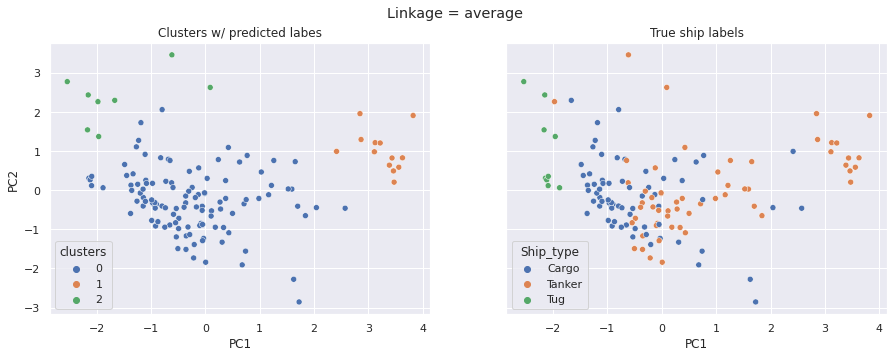

In [ ]:
#2D PCA 
pca = PCA(2)
pca_df = pd.DataFrame(pca.fit_transform(standard_features),columns=['PC1','PC2'])

#Clustering the data
amc = AgglomerativeClustering(n_clusters=3,linkage='average').fit(pca_df)
pca_df['clusters'] = pd.Categorical(amc.labels_)
concat = pd.concat([pca_df,labels],axis=1)

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Linkage = average')

# Scatterplot with predicted labels
sns.scatterplot(ax=axes[0], x=pca_df.PC1, y=pca_df.PC2,hue=pca_df.clusters)
axes[0].set_title('Clusters w/ predicted labes')

# Scatterplot with true ship labels
sns.scatterplot(ax=axes[1], x=concat.PC1, y=concat.PC2,hue=concat.Ship_type)
axes[1].set_title('True ship labels')

In [ ]:
# Adjusted rand_score (ARI) for linkage = average
ARI = adjusted_rand_score(concat.Ship_type,pca_df.clusters)
print(f'Rand score between predicted and true labels: {ARI}')

Rand score between predicted and true labels: 0.10722149985940695


####  Part 3a : Answers here:
<font color = red> I would say based on above plots that the algorithm actually did quite well at least predicting "Cargo" and "Tug" ship clusters, but then "Tanker" prediction didn't go that well at all and most of the data points landed in wrong cluster. So, the clustering was partly successful, but not at very good level. 

<font color = red>As what comes to the rand score between predicted and true labels, I would say that prediction method (amc) was able predict about 10.7% from the labels correctly which is quite poor result. As I mentioned before, "Tanker" ship labels were predicted very poorly, so I think that is the reason for the fairly low rand score. 

###  Part 3b: Another linkage criterion
 
 - Perform the same steps as in the previous task (3a), but this time using the "complete" linkage criterion. Visualize the clusters (predicted labels vs. the real labels) and compute the adjusted rand score for the predictions.
 
 - Which linkage criterion performs better based on visual inspection and the adjusted rand score? How do the two criteria differ from each other?
 
 - Compare the formulas for adjusted rand score and silhouette score. Can you explain (briefly) why a given linkage criterion can perform relatively well with respect to one metric and badly w.r.t. the other one?

Text(0.5, 1.0, 'True ship labels')

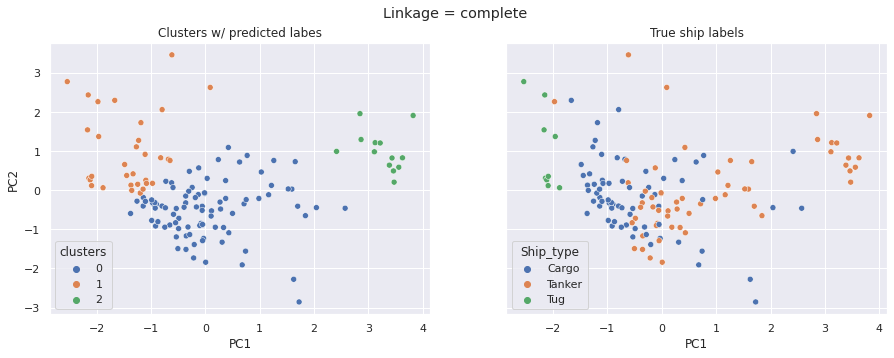

In [ ]:
#2D PCA 
pca1 = PCA(2)
pca_df1 = pd.DataFrame(pca.fit_transform(standard_features),columns=['PC1','PC2'])

#Clustering the data
amc1 = AgglomerativeClustering(n_clusters=3,linkage='complete').fit(pca_df1)
pca_df1['clusters'] = pd.Categorical(amc1.labels_)
concat1 = pd.concat([pca_df1,labels],axis=1)

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Linkage = complete')

# Scatterplot with predicted labels
sns.scatterplot(ax=axes[0], x=pca_df1.PC1, y=pca_df1.PC2,hue=pca_df1.clusters)
axes[0].set_title('Clusters w/ predicted labes')

# Scatterplot with true ship labels
sns.scatterplot(ax=axes[1], x=concat1.PC1, y=concat1.PC2,hue=concat1.Ship_type)
axes[1].set_title('True ship labels')

In [ ]:
# Adjusted rand_score (ARI) for linkage = complete
ARI1 = adjusted_rand_score(concat1.Ship_type,pca_df1.clusters)
print(f'Rand score between predicted and true labels: {ARI1}')

Rand score between predicted and true labels: 0.11475878110650158


Part 3b : Answers here:

<font color = red> As we can see from the adjusted rand scores, the linkage "complete" performed better, but not much by managing to only predict about 11,5% of the labels correctly. 

<font color = red> Difference between linkages "average" and "complete" is that "average" uses as the name already implies, average distances between each observation of the sets and then "complete" or "maximum" as the later name implies uses maximum distances between each observation of the sets.

<font color = red> Linkage criteriation works better with the silhouette score because of the calculation style of the given metric in use. For e.x in our case ARI and Silhouette score differ in calculation style in a way that ARI measures the distance of the observations and of the sets giving a result which tells us how **similar** the clusters are, and silhouette score measures **distance** between clusters giving us the score by measuring each observations distance between clusters. So the actual answer is that because silhouette score measures the distance between clusters it performs better with the given linkages.

### Part 4: Plot the dendrogram

 - As the last step, plot dendrograms to visualize the merging processes.
 - For this you will need a linkage matrix - while you can extract one from a fitted AgglomerativeClustering object, it is much easier to use the scipy implementation (scipy.cluster.hierarchy.linkage).
 - Compute the linkage matrix using both average and complete linkage, and plot the dendrograms using scipy.cluster.hierarchy.dendrogram). Truncate the dendrogram so that three levels of the dendrogram tree are visible for better readability.
 - How do you interpret the dendrograms? How do they differ?

Text(0.5, 1.0, 'Linkage = complete')

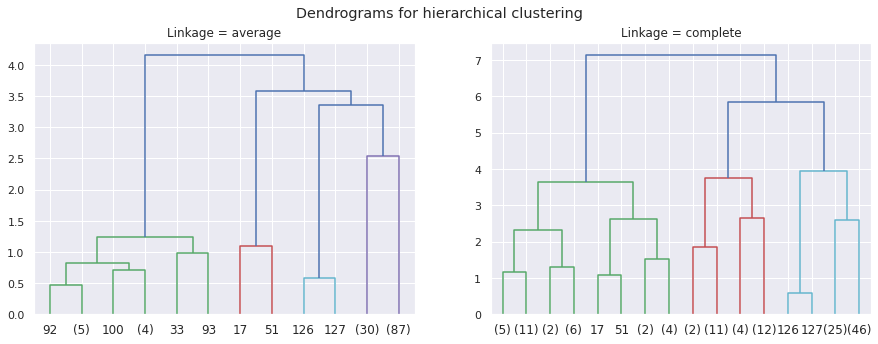

In [ ]:
#2D PCA 
pca = PCA(2)
pca_df3 = pd.DataFrame(pca.fit_transform(standard_features),columns=['PC1','PC2'])

#Clustering the data
amc3 = AgglomerativeClustering(n_clusters=3).fit(pca_df3)
pca_df3['clusters'] = pd.Categorical(amc3.labels_)

# Extract linkage type for the data to be plotted
data = hierarchy.linkage(pca_df3,'average')
data1 = hierarchy.linkage(pca_df3,'complete')

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Dendrograms for hierarchical clustering')

# Dendo for linkage average
dendo0 = hierarchy.dendrogram(data,p=3,truncate_mode='level', ax=axes[0])
axes[0].set_title('Linkage = average')

# Dendo for linkage complete
dendo1 = hierarchy.dendrogram(data1,p=3,truncate_mode='level', ax=axes[1])
axes[1].set_title('Linkage = complete')

####  Part 4 : Answers here:

<font color = red> Dendrograms will start clustering from bottom to up. Main point here is that dendo will eventually reach one single cluster after climbing and merging clusters from bottom (leafs) till it gets to a most upper position it can (branch end) and then there is nothing to merge anymore.

<font color = red> If we start from bottom, dendos differ as first, average has 12 clusters to start with and complete has 16, so complete has more merging to do. Second, it seems that average merges its clusters from bottom to up much faster than complete which tells us that average interprets those clusters more similar than complete, but as we look at the complete's plot, we can see that the merging is more even throughout the whole merging until it reaches the most upper branch. All in all, average interprets that left branch differs from right one very much, but at the same time left and right branch merges to a certain point very fast and complete does more even job in this and shows less dissimilarity. 

### Part 5 (optional bonus task): Implement K-Means clustering

 - For an extra point (pass with honors i.e. 100 in the 0/50/100 grading scheme), write your <b>own implementation</b> of the K-means clustering algorithm. The bonus point will be granted for a working implementation of the algorithm. It will not be granted for e.g. merely performing clustering using the scikit-learn implementation of K-Means or an unfinished implementation.
 - Visualize the labels predicted by your K-Means implementation against the real labels and compute the adjusted rand index.
 - Compare your K-Means implementation to the scikit-learn implementation. Do you get the same results? If not, why?
 - Remember to comment your code for readability.

####  Part 5 : Answers here:

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('DAKD2021_exercise4_template.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/DAKD2021_exercise4_template.ipynb to pdf
[NbConvertApp] Support files will be in DAKD2021_exercise4_template_files/
[NbConvertApp] Making directory ./DAKD2021_exercise4_template_files
[NbConvertApp] Making directory ./DAKD2021_exercise4_template_files
[NbConvertApp] Making directory ./DAKD2021_exercise4_template_files
[NbConvertApp] Making directory ./DAKD2021_exercise4_template_files
[NbConvertApp] Writing 56382 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 189851 bytes to /content/drive/My Drive/DAKD2021_exercise4_template.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'